<a href="https://colab.research.google.com/github/dibayaa/BudgetCalc/blob/main/BudgetCalc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#Feature: Read data from an external file, such as text, JSON, CSV, etc and use that data in your application
#Feature: Create a dictionary or list, populate it with several values, retrieve at least one value, and use it in your program
#Feature: Visualize data in a graph, chart, or other visual representation of data

#author: @Anthony Dibaya



# read in file
df = pd.read_csv('cashflow.csv', index_col ='Date', 
parse_dates = True)
df.head()

,Amount,Category,Transaction Type
Date,,,
2021-03-01,-1000.0,housing,Expense
2021-03-02,-200.0,groceries,Expense
2021-03-03,-160.0,car_insurance,Expense
2021-03-04,-90.0,phone_bill,Expense
2021-03-05,-50.0,health_insurance,Expense


In [18]:
# Avg spending per category
avg_spending_cat = df.groupby('Category').mean().sort_values(by='Amount')
print(avg_spending_cat)

                  Amount
Category                
housing          -1000.0
debt              -500.0
groceries         -200.0
car_insurance     -160.0
clothing          -100.0
savings           -100.0
emergency_fund    -100.0
stocks            -100.0
phone_bill         -90.0
health_insurance   -50.0
gas                -50.0
night_out          -40.0
charity            -30.0
cc_membership      -20.0
gym_membership     -15.0
snacks             -15.0
netflix             -5.0
phone_apps          -5.0
dividends           30.0
cashflow_re        300.0
freelance         1500.0
work              3000.0


In [19]:
# Sum Expense & Income 
sum_transactions = df.groupby('Transaction Type').sum().sort_values(by='Amount')
print(sum_transactions)

                  Amount
Transaction Type        
Expense          -2580.0
Income            4830.0


In [20]:
# Calculate Savings (sum column "Amount" to add expenses vs income; positive = savings)
column_name = "Amount"
calc_savings = df[column_name].sum()
print(calc_savings)

2250.0


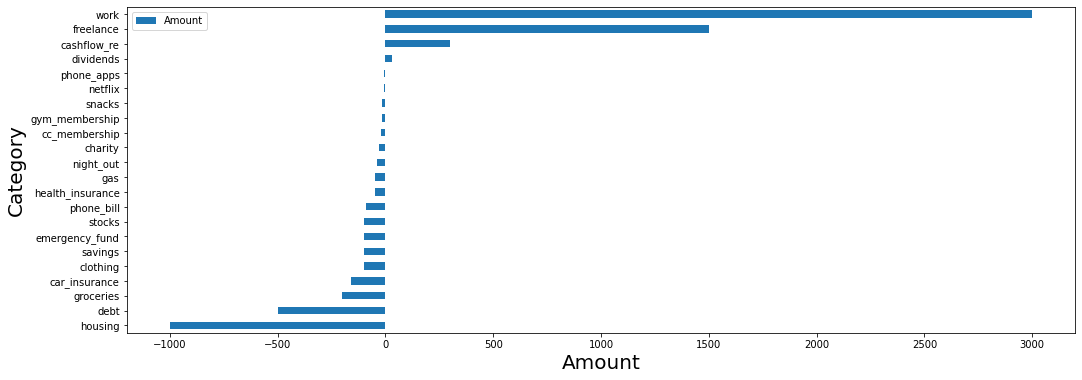

In [21]:
fig, ax = plt.subplots()
avg_spending_cat.plot(kind='barh', ax=ax, figsize= (17,6))
ax.set_xlabel('Amount', size=20)
ax.set_ylabel('Category', size=20);

In [23]:
#Organize expenses within categories as "necessary" or "unnecessary" 
expense_type={
    'housing':'necessary',
    'groceries':'necessary',
    'car_insurance':'necessary',
    'phone_bill':'necessary',
    'health_insurance':'necessary',
    'clothing':'unnecessary',
    'debt':'necessary',
    'savings':'necessary',
    'emergency_fund':'necessary',
    'night_out':'unnecessary',
    'gas':'necessary',
    'snacks':'unnecessary',
    'netflix':'unnecessary',
    'stocks':'unnecessary',
    'gym_membership':'unnecessary',
    'phone_apps':'unnecessary',
    'cc_membership':'unnecessary',
    'charity':'unnecessary'
}
df['Expense Type'] = df['Category'].map(expense_type)
df.head()

,Amount,Category,Transaction Type,Expense Type
Date,,,,
2021-03-01,-1000.0,housing,Expense,necessary
2021-03-02,-200.0,groceries,Expense,necessary
2021-03-03,-160.0,car_insurance,Expense,necessary
2021-03-04,-90.0,phone_bill,Expense,necessary
2021-03-05,-50.0,health_insurance,Expense,necessary


In [25]:
# Calculate Descriptive Statistics for each expense type (NEEDS WORK)

df.groupby('Expense Type').describe()

Amount                                                          
              count        mean         std     min    25%    50%   75%   max
Expense Type                                                                 
necessary       9.0 -250.000000  313.488437 -1000.0 -200.0 -100.0 -90.0 -50.0
unnecessary     9.0  -36.666667   37.583241  -100.0  -40.0  -20.0 -15.0  -5.0